In [63]:
import time
from datetime import timedelta
import matplotlib.pyplot as plt
#linear algebra
import numpy as np
#data processing
import pandas as pd
#data visualization
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

In [64]:
data = pd.read_csv("./data/bank-additional-full.csv")

In [65]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [67]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:title={'center':'Deposit value counts'}>

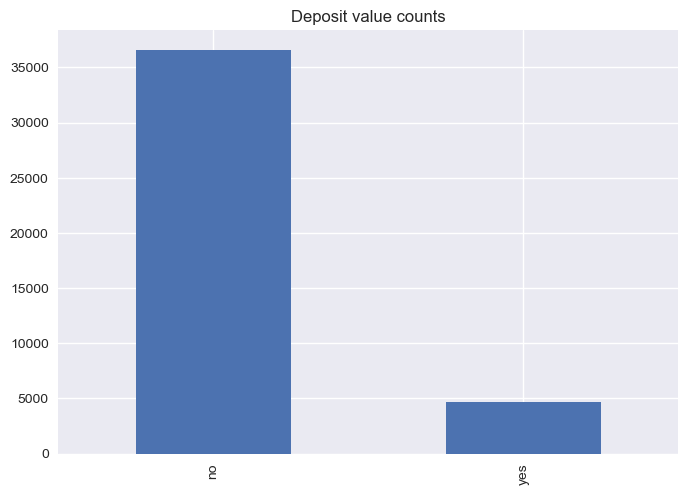

In [68]:
value_counts = data['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

In [69]:
temp = value_counts/data['y'].count()
temp

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [70]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [71]:
data['education']=np.where(data['education'] =='basic.9y','Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y','Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y','Basic', data['education'])
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

Text(0, 0.5, 'Frekuensi Pembelian')

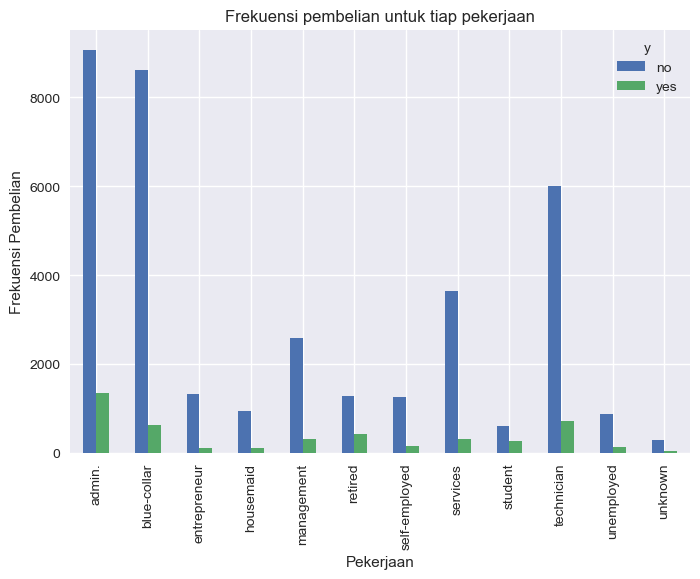

In [73]:
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title("Frekuensi pembelian untuk tiap pekerjaan")
plt.xlabel("Pekerjaan")
plt.ylabel("Frekuensi Pembelian")

Text(0, 0.5, 'Frekuensi Subscribe')

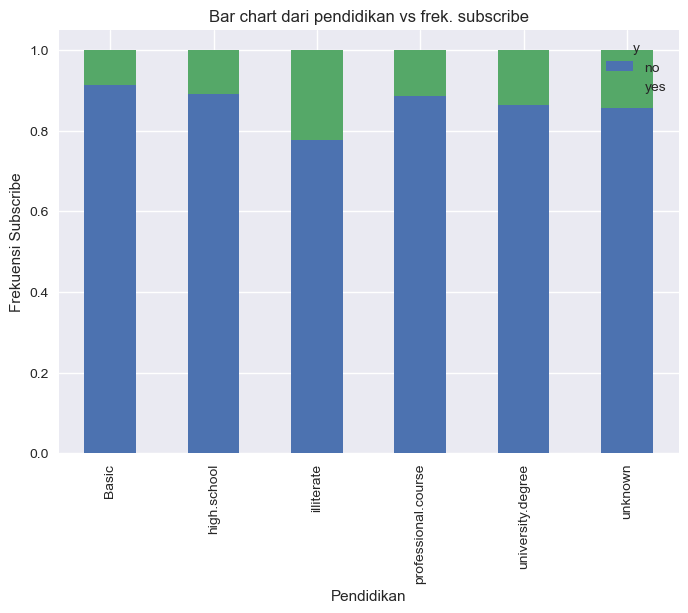

In [74]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart dari pendidikan vs frek. subscribe")
plt.xlabel("Pendidikan")
plt.ylabel("Frekuensi Subscribe")

Text(0, 0.5, 'Frekuensi Subscribe')

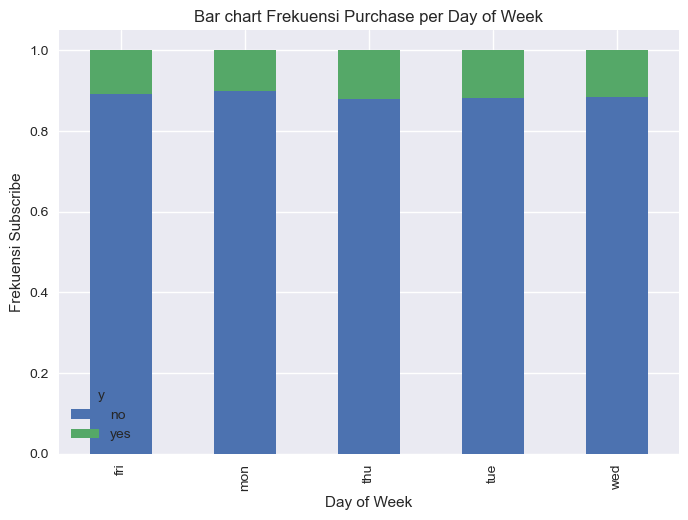

In [75]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart Frekuensi Purchase per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Frekuensi Subscribe")

Text(0, 0.5, 'Frekuensi Subscribe')

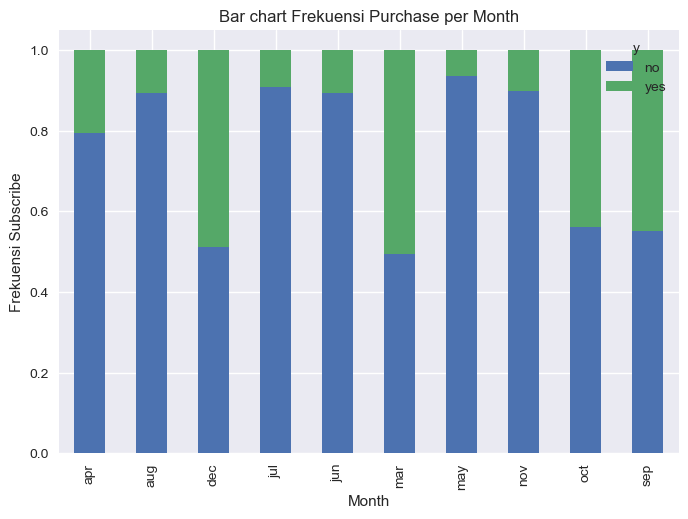

In [76]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart Frekuensi Purchase per Month")
plt.xlabel("Month")
plt.ylabel("Frekuensi Subscribe")

Text(0, 0.5, 'Frekuensi Subscribe')

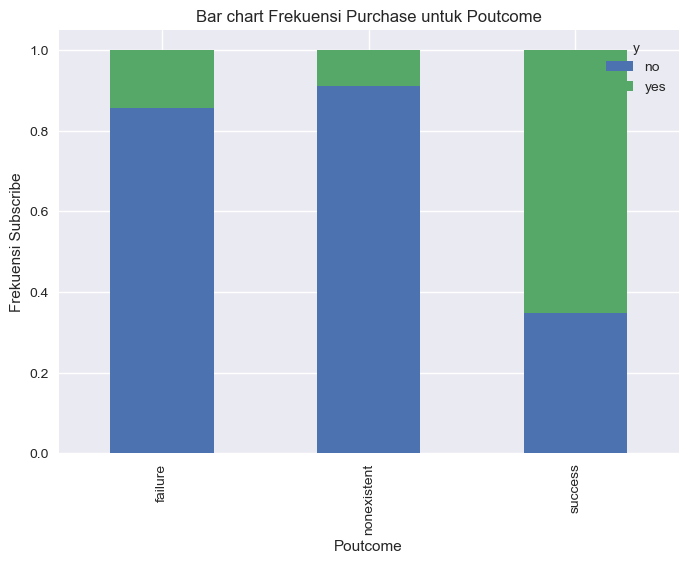

In [77]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart Frekuensi Purchase untuk Poutcome")
plt.xlabel("Poutcome")
plt.ylabel("Frekuensi Subscribe")

Text(0, 0.5, 'Frekuensi')

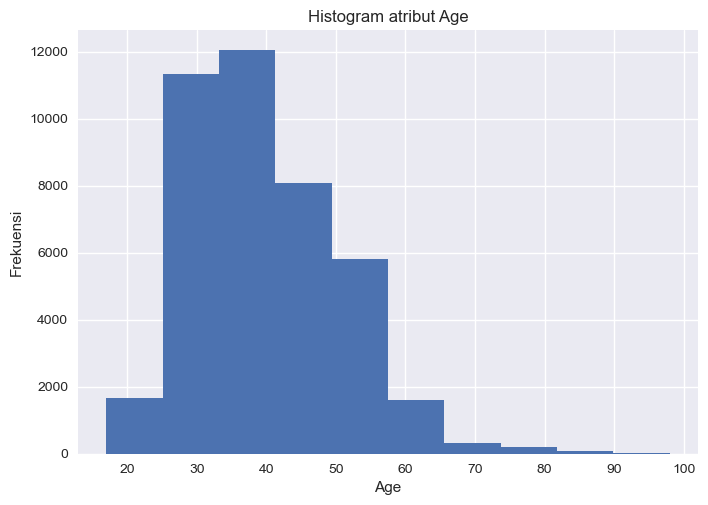

In [78]:
data.age.hist()
plt.title('Histogram atribut Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

In [79]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
print(cat_list)

       poutcome_failure  poutcome_nonexistent  poutcome_success
0                     0                     1                 0
1                     0                     1                 0
2                     0                     1                 0
3                     0                     1                 0
4                     0                     1                 0
...                 ...                   ...               ...
41183                 0                     1                 0
41184                 0                     1                 0
41185                 0                     1                 0
41186                 0                     1                 0
41187                 1                     0                 0

[41188 rows x 3 columns]


In [80]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [83]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Program\anaconda3\envs\graduate\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program\anaconda3\envs\graduate\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10710   259]
 [  842   546]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     10969
         yes       0.68      0.39      0.50      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [94]:
y_pred=pd.DataFrame(logreg.predict(X_test))

In [97]:
y_test['y'] = y_test['y'].apply(lambda x: 0 if x=='no' else 1)

In [113]:
y_pred[0]= y_test[0].apply(lambda x: 0 if x=='no' else 1)

KeyError: 0

In [111]:
y_pred[0]

0        no
1        no
2        no
3        no
4        no
         ..
12352    no
12353    no
12354    no
12355    no
12356    no
Name: 0, Length: 12357, dtype: object

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: could not convert string to float: 'no'